<a href="https://colab.research.google.com/github/20Alireza02/System-Identification/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

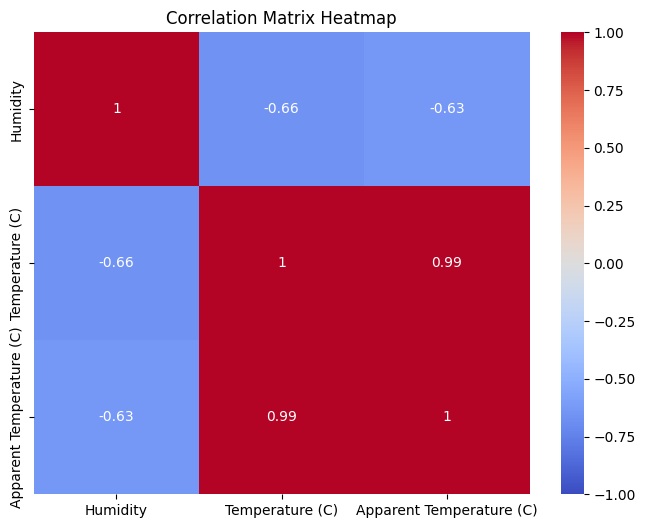

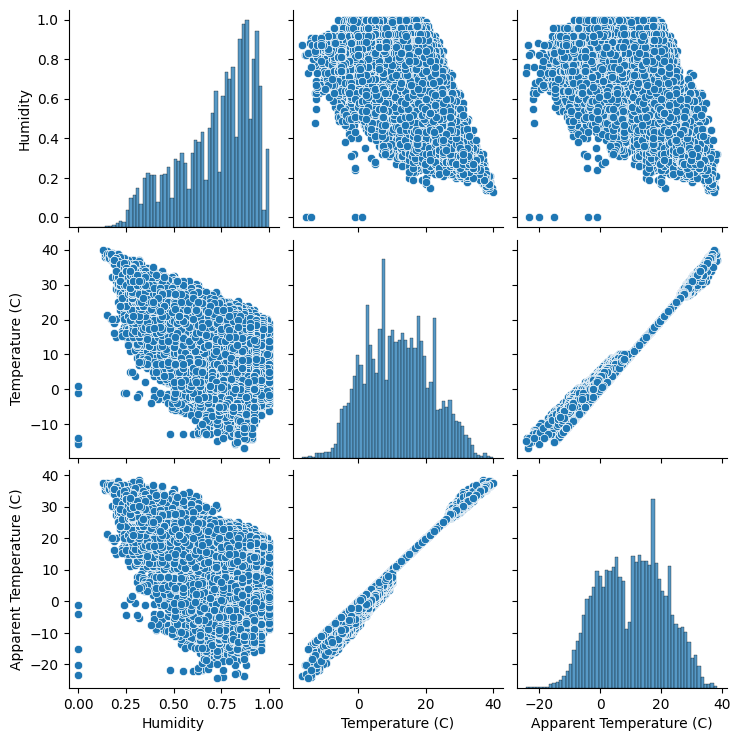

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# بارگذاری دیتاست
data = pd.read_csv('weatherHistory.csv')

# انتخاب ویژگی‌ها
features = ['Humidity', 'Temperature (C)', 'Apparent Temperature (C)']
subset = data[features]

# هیت‌مپ ماتریس همبستگی
plt.figure(figsize=(8, 6))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# هیستوگرام پراکندگی
sns.pairplot(subset)
plt.show()

θ (theta) from LS: [ 0.7345964  -0.44860222  0.32697116]

LS Metrics (Train):
MSE: 0.0213
MAE: 0.1165
R2: 0.4444

LS Metrics (Test):
MSE: 0.0214
MAE: 0.1170
R2: 0.4374

LS Metrics (All Data):
MSE: 0.0213
MAE: 0.1166
R2: 0.4424


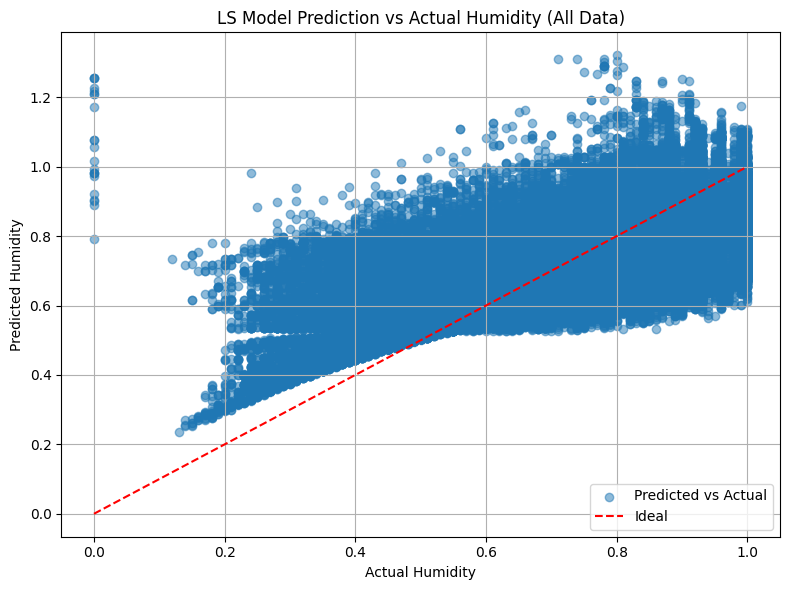

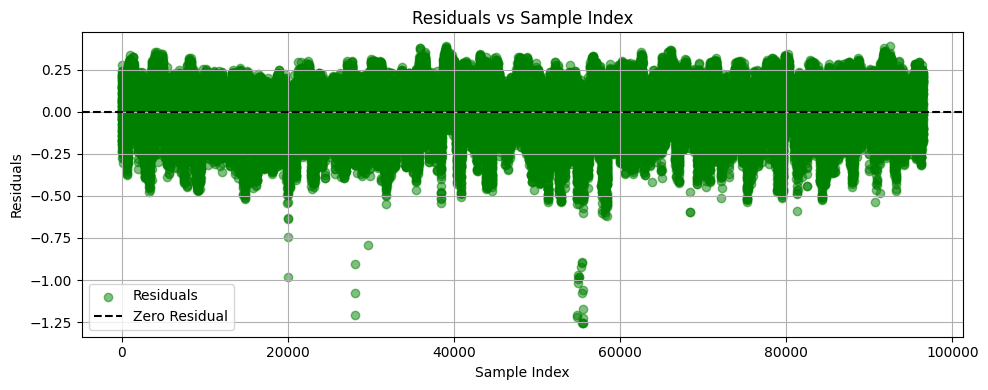

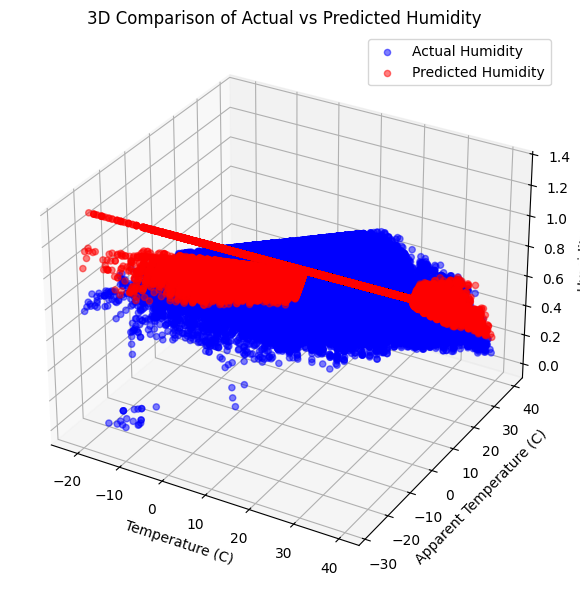

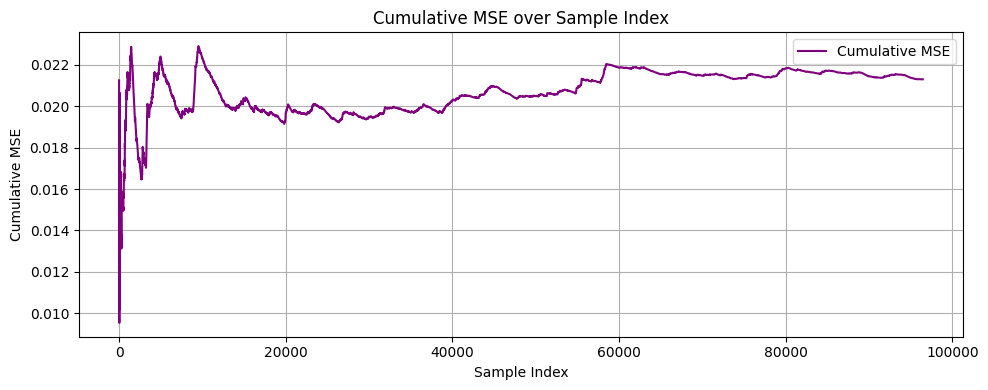

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

# 1. بارگذاری داده‌ها
df = pd.read_csv('weatherHistory.csv')
df = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']].dropna()

# 2. آماده‌سازی داده‌ها
X_raw = df[['Temperature (C)', 'Apparent Temperature (C)']].values
y = df['Humidity'].values.reshape(-1, 1)

# 3. استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 4. افزودن بایاس
X = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# 5. تقسیم داده‌ها به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test_with_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# 6. محاسبه تتا با LS
theta_ls = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ (X_train_with_bias.T @ y_train)

# 7. پیش‌بینی
y_pred_train = X_train_with_bias @ theta_ls
y_pred_test = X_test_with_bias @ theta_ls
y_pred_all = X @ theta_ls

# 8. محاسبه معیارهای خطا
# برای داده‌های آموزش
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# برای داده‌های آزمون
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# برای کل داده‌ها
mse_all = mean_squared_error(y, y_pred_all)
mae_all = mean_absolute_error(y, y_pred_all)
r2_all = r2_score(y, y_pred_all)

# 9. نمایش ضرایب و معیارها
print("θ (theta) from LS:", theta_ls.flatten())
print("\nLS Metrics (Train):")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"R2: {r2_train:.4f}")

print("\nLS Metrics (Test):")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"R2: {r2_test:.4f}")

print("\nLS Metrics (All Data):")
print(f"MSE: {mse_all:.4f}")
print(f"MAE: {mae_all:.4f}")
print(f"R2: {r2_all:.4f}")

# 10. رسم نمودار مقدار واقعی vs پیش‌بینی
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_all, alpha=0.5, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Ideal')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('LS Model Prediction vs Actual Humidity (All Data)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 11. رسم نمودار باقیمانده‌ها
residuals = y - y_pred_all
plt.figure(figsize=(10, 4))
plt.scatter(range(len(residuals)), residuals, color='green', alpha=0.5, label='Residuals')
plt.axhline(0, color='k', linestyle='--', label='Zero Residual')
plt.xlabel('Sample Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Sample Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. رسم نمودار سه‌بعدی
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
temp = X_raw[:, 0]  # Temperature (C)
app_temp = X_raw[:, 1]  # Apparent Temperature (C)
# نقاط واقعی
ax.scatter(temp, app_temp, y.flatten(), c='blue', alpha=0.5, label='Actual Humidity')
# نقاط پیش‌بینی‌شده
ax.scatter(temp, app_temp, y_pred_all.flatten(), c='red', alpha=0.5, label='Predicted Humidity')
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Apparent Temperature (C)')
ax.set_zlabel('Humidity')
ax.set_title('3D Comparison of Actual vs Predicted Humidity')
ax.legend()
plt.tight_layout()
plt.show()

# 13. محاسبه و رسم MSE تجمعی
squared_errors = (y - y_pred_all) ** 2
cumulative_mse = np.cumsum(squared_errors) / np.arange(1, len(squared_errors) + 1)

plt.figure(figsize=(10, 4))
plt.plot(range(len(cumulative_mse)), cumulative_mse, color='purple', label='Cumulative MSE')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative MSE')
plt.title('Cumulative MSE over Sample Index')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

RLS Metrics:
MSE: 0.0213
MAE: 0.1169
R2: 0.4425


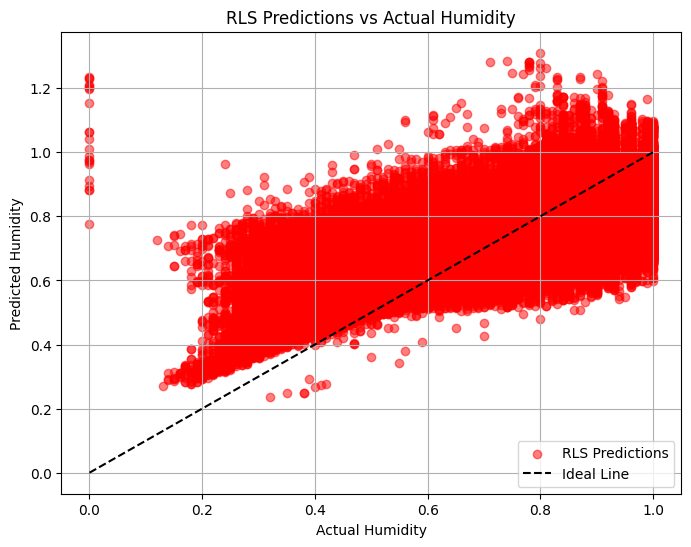

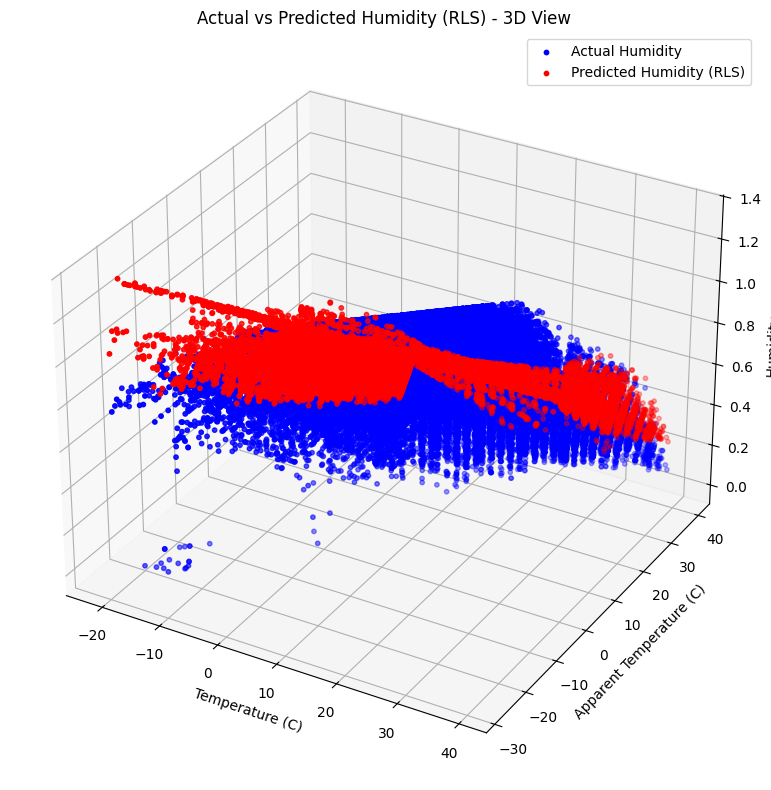

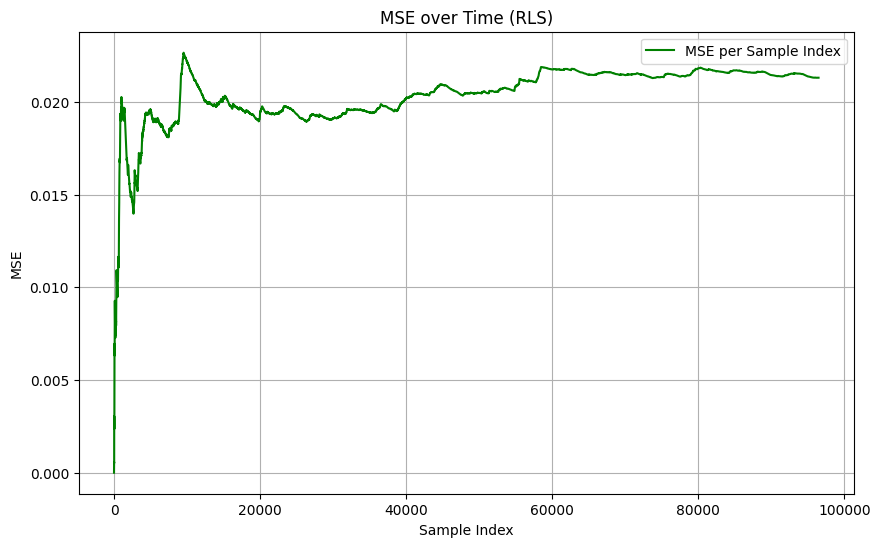

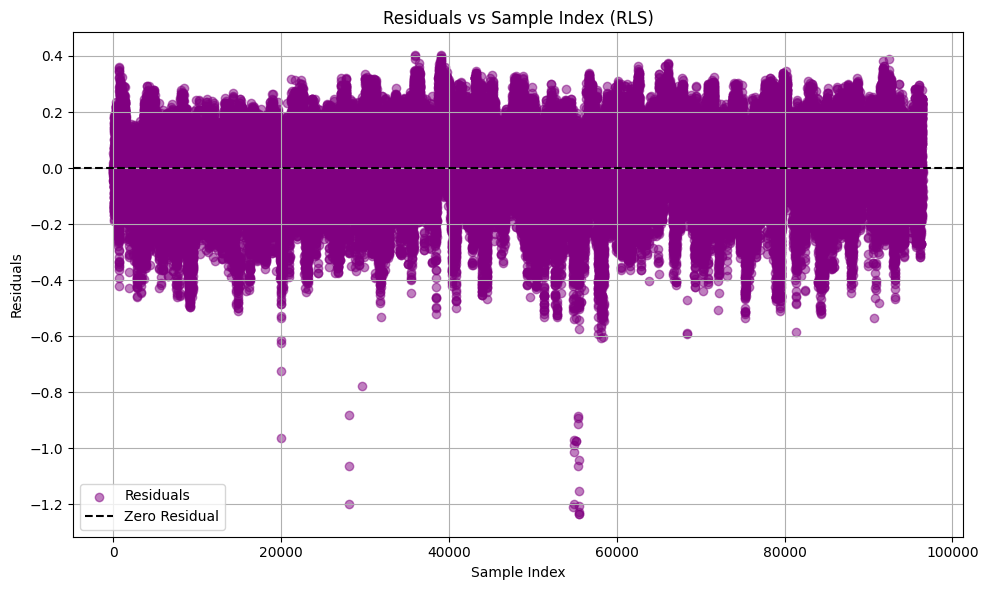

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# بارگذاری داده‌ها
df = pd.read_csv('weatherHistory.csv')
df = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']].dropna()

# استخراج ویژگی‌ها و خروجی
X_raw = df[['Temperature (C)', 'Apparent Temperature (C)']].values
y = df['Humidity'].values

# استانداردسازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# اضافه کردن بایاس
X = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# تنظیمات اولیه RLS
n_features = X.shape[1]
theta = np.zeros((n_features, 1))           # θ(0)
P = np.eye(n_features) * 1000               # P(0)

# ذخیره پیش‌بینی‌ها و MSE
y_preds = []
mse_per_step = []

# الگوریتم RLS
for k in range(len(y)):
    x_k = X[k].reshape(-1, 1)
    y_k = y[k]

    e_k = y_k - (x_k.T @ theta)[0, 0]
    gamma_k = (P @ x_k) / (x_k.T @ P @ x_k + 1)
    theta = theta + gamma_k * e_k
    P = (np.eye(n_features) - gamma_k @ x_k.T) @ P

    y_pred = (x_k.T @ theta)[0, 0]
    y_preds.append(y_pred)

    # خطای MSE تا این لحظه
    mse_per_step.append(mean_squared_error(y[:k+1], y_preds[:k+1]))

y_preds = np.array(y_preds)

# محاسبه معیارهای نهایی خطا
mse = mean_squared_error(y, y_preds)
mae = mean_absolute_error(y, y_preds)
r2 = r2_score(y, y_preds)

# محاسبه باقیمانده‌ها
residuals = y - y_preds

# ------------------------ چاپ نتایج ------------------------
print("RLS Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")

# ------------------------ نمودار پراکندگی ------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y, y_preds, color='red', label='RLS Predictions', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Ideal Line')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('RLS Predictions vs Actual Humidity')
plt.legend()
plt.grid(True)
plt.show()

# ------------------------ نمودار ۳ بعدی ------------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_raw[:, 0], X_raw[:, 1], y, c='blue', label='Actual Humidity', s=10)
ax.scatter(X_raw[:, 0], X_raw[:, 1], y_preds, c='red', label='Predicted Humidity (RLS)', s=10)
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Apparent Temperature (C)')
ax.set_zlabel('Humidity')
ax.set_title('Actual vs Predicted Humidity (RLS) - 3D View')
ax.legend()
plt.tight_layout()
plt.show()

# ------------------------ نمودار MSE برحسب اندیس ------------------------
plt.figure(figsize=(10, 6))
plt.plot(mse_per_step, label='MSE per Sample Index', color='green')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('MSE over Time (RLS)')
plt.grid(True)
plt.legend()
plt.show()

# ------------------------ نمودار باقیمانده‌ها ------------------------
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.5, label='Residuals')
plt.axhline(0, color='k', linestyle='--', label='Zero Residual')
plt.xlabel('Sample Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Sample Index (RLS)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

WLS Metrics:
MSE: 0.0213
MAE: 0.1169
R2: 0.4420
WLS Coefficients (θ): [ 0.73720773 -0.44379557  0.32575899]


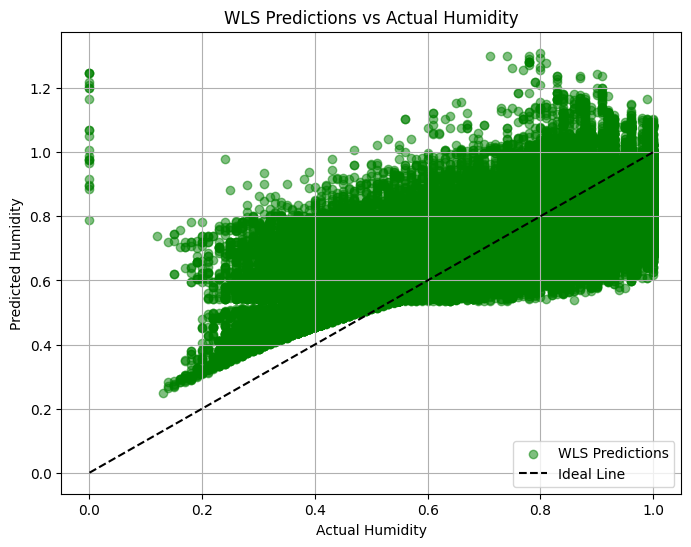

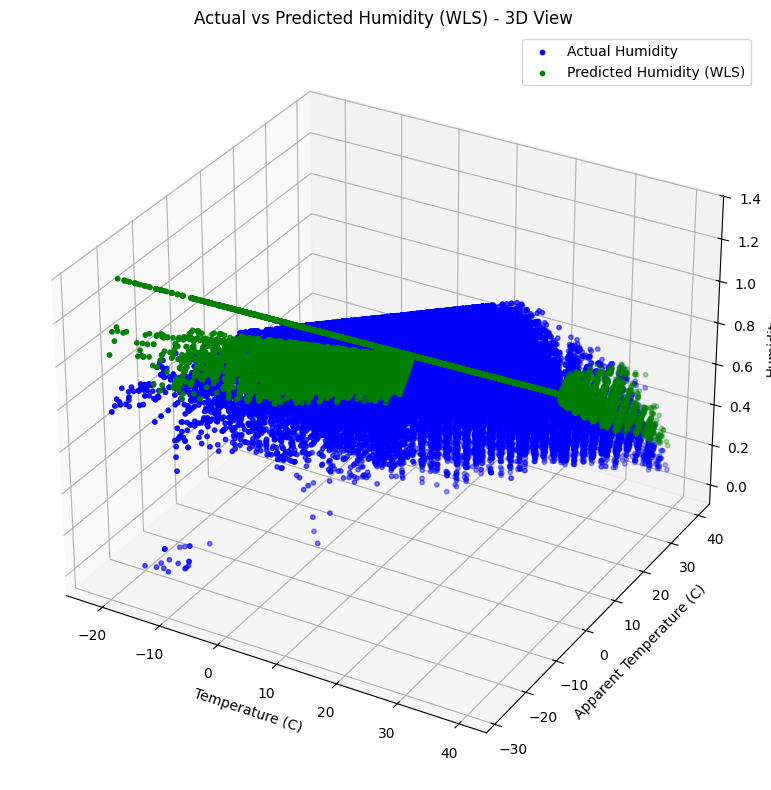

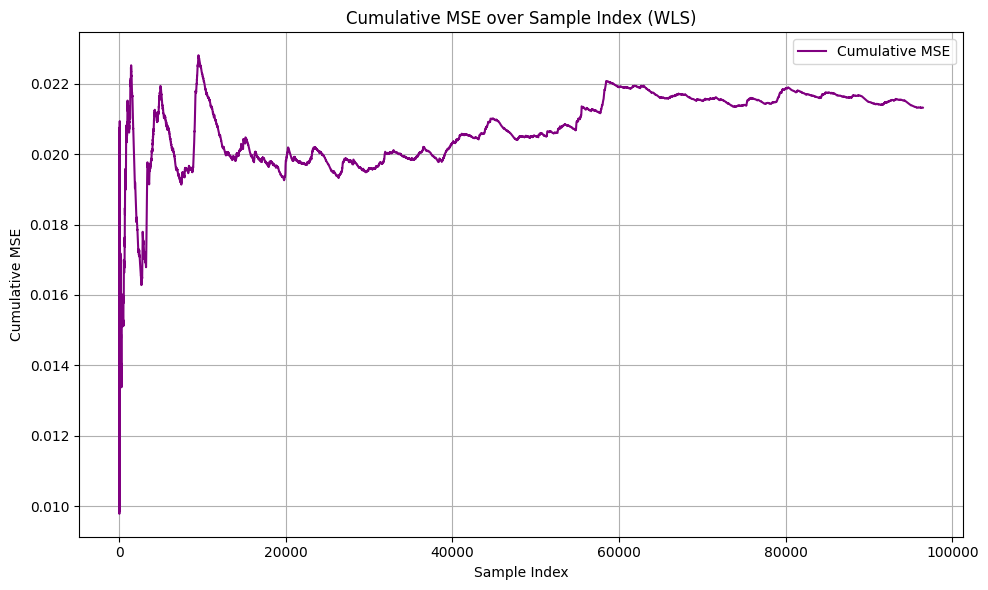

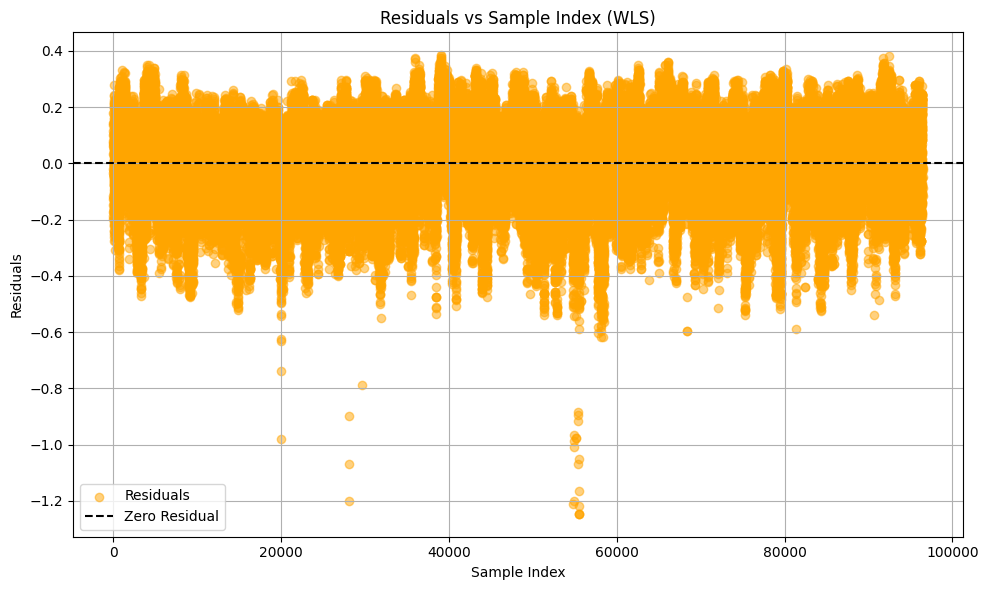

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

# بارگذاری داده‌ها
df = pd.read_csv('weatherHistory.csv')
df = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']].dropna()

# استخراج ویژگی‌ها و خروجی
X_raw = df[['Temperature (C)', 'Apparent Temperature (C)']].values
y = df['Humidity'].values

# استانداردسازی
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# افزودن بایاس (θ0)
X = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))  # x(k) = [1, x1, x2]

# وزن‌دهی بر اساس پراکندگی
residuals = y - np.mean(y)
weights = 1 / (1 + residuals ** 2)
weights = weights / weights.max()
Q = np.diag(weights)

# تخمین پارامترهای WLS
theta_hat = np.linalg.inv(X.T @ Q @ X) @ (X.T @ Q @ y)

# پیش‌بینی
y_preds = X @ theta_hat

# محاسبه معیارهای خطا
mse = mean_squared_error(y, y_preds)
mae = mean_absolute_error(y, y_preds)
r2 = r2_score(y, y_preds)

# محاسبه باقیمانده‌ها
residuals = y - y_preds

# چاپ معیارها
print("WLS Metrics:")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")
print("WLS Coefficients (θ):", theta_hat.flatten())

# ----------------------- نمودار پراکندگی -----------------------
plt.figure(figsize=(8, 6))
plt.scatter(y, y_preds, color='green', label='WLS Predictions', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='Ideal Line')
plt.xlabel('Actual Humidity')
plt.ylabel('Predicted Humidity')
plt.title('WLS Predictions vs Actual Humidity')
plt.legend()
plt.grid(True)
plt.show()

# ----------------------- نمودار سه‌بعدی -----------------------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_raw[:, 0], X_raw[:, 1], y, color='blue', s=10, label='Actual Humidity')
ax.scatter(X_raw[:, 0], X_raw[:, 1], y_preds, color='green', s=10, label='Predicted Humidity (WLS)')
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Apparent Temperature (C)')
ax.set_zlabel('Humidity')
ax.set_title('Actual vs Predicted Humidity (WLS) - 3D View')
ax.legend()
plt.tight_layout()
plt.show()

# ----------------------- نمودار Cumulative MSE -----------------------
squared_errors = (y - y_preds) ** 2
cumulative_mse = np.cumsum(squared_errors) / np.arange(1, len(squared_errors) + 1)

plt.figure(figsize=(10, 6))
plt.plot(range(len(cumulative_mse)), cumulative_mse, color='purple', label='Cumulative MSE')
plt.xlabel('Sample Index')
plt.ylabel('Cumulative MSE')
plt.title('Cumulative MSE over Sample Index (WLS)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------- نمودار باقیمانده‌ها -----------------------
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, color='orange', alpha=0.5, label='Residuals')
plt.axhline(0, color='k', linestyle='--', label='Zero Residual')
plt.xlabel('Sample Index')
plt.ylabel('Residuals')
plt.title('Residuals vs Sample Index (WLS)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()